# Querying and Structuring Data from the Twitter API
Purpose: Query semi-structured data from the public Twitter API<br>
HARSHIKA JAIN<br>
Professor John Stamper and EriK Harpstead<br>
05839 - Interactive Data Science HW2<br>
Carnegie Mellon University<br>


## Process
* Apply for a developer account
* Propose a question: This involves one of the following features of a tweet: (a) hashtags, (b) user mentions, (c) url links, (d) symbols (i.e. emoji), (e) the text of tweets themselves. Other elements of tweets (e.g., follower counts, retweets, likes, etc.can be incorporated
* Interface with Twitter API using Tweepy, a library
* Model and manipulate the data
* Hide API key!


## Hashtags Chosen
**#climatestrike and #climateaction**

## Question
**What is people's sentiment around climate change? Who are the topmost advocates of it?** 

## Querying Data
A link that was helpful to do this process was: https://medium.com/@jaimezornoza/downloading-data-from-twitter-using-the-streaming-api-3ac6766ba96c
The code used to query data has been submitted is a seperate python file. 

In [1]:
import json
import pandas as pd
tweets_data_path = "twitter_data.txt"  
tweets_data = []  
tweets_file = open(tweets_data_path, "r")  
for line in tweets_file:  
    try:  
        tweet = json.loads(line)  
        tweets_data.append(tweet)  
    except:  
        continue
tweets = pd.DataFrame()

In [2]:
#remove RT from the text, split text field after the link
tweets['text'] = list(map(lambda tweet: tweet['text'].split('https://t.co')[0].replace('RT','',True), tweets_data))
tweets['Username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['Timestamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['followers_count'] = list(map(lambda tweet: tweet['user']['followers_count'], tweets_data))
tweets.head()

,text,Username,Timestamp,followers_count
0,@MikeHudema: Ocean Waves can be a source of u...,ChevyBoltGuy,Sun Sep 22 18:05:41 +0000 2019,255
1,@U2: 'We’re with you @GretaThunberg\n#Climate...,danieljdoliveir,Sun Sep 22 18:05:41 +0000 2019,20
2,"@sahouraxo: Oh, look. The man who waged new i...",MaryamTrolls,Sun Sep 22 18:05:41 +0000 2019,44
3,@ParHolmgren: #TimeForAction indeed!\nWe need...,hemidanf,Sun Sep 22 18:05:42 +0000 2019,302
4,@MaryJoe38642126: .@TulsiGabbard .@BernieSand...,bilic_mariana,Sun Sep 22 18:05:42 +0000 2019,44


In [3]:
tweets.tail()

,text,Username,Timestamp,followers_count
995,@Sema4Texas: You can always count on Cornyn a...,StealYoRedBull,Sun Sep 22 18:13:10 +0000 2019,1306
996,@FAOForestry: “Stepping up action on #forests...,AnitaTibasaaga,Sun Sep 22 18:13:11 +0000 2019,812
997,@AminaJMohammed: Can’t catch my breath inside...,anamgren,Sun Sep 22 18:13:11 +0000 2019,2067
998,@GassmanGassmann: I numeri del #ClimateStrike...,habitat66_diego,Sun Sep 22 18:13:11 +0000 2019,1375
999,"@sahouraxo: Oh, look. The man who waged new i...",halmasonberg,Sun Sep 22 18:13:12 +0000 2019,145


In [4]:
tweets.describe()

,followers_count
count,1000.00000
mean,4961.76700
std,41387.94081
min,0.00000
25%,105.75000
50%,434.00000
75%,1737.25000
max,920489.00000


In [5]:
tweets['Username']

0         ChevyBoltGuy
1      danieljdoliveir
2         MaryamTrolls
3             hemidanf
4        bilic_mariana
5       Tahani_alhajri
6               wrytir
7         Avenue_C_Boy
8           AmyW1ckham
9              rspuls7
10     TheLesbianMafia
11       christophbals
12     penelopemerriw1
13            CThelpit
14             A_MayDB
15           Hefdotcom
16        CatintheHome
17       caitlinnoneal
18        jonesistired
19       bilic_mariana
20             mlynne3
21       clutterbugg92
22     josephpapptheat
23      SinghalSailesh
24       janeneniblock
25          marimacint
26       barfingbarfly
27          CascadiaCA
28       bilic_mariana
29       madrid_angulo
            ...       
970        lakerspats1
971         Santi_AFC_
972    stepaniukruslan
973     Crinklekitten1
974    johnvic44372161
975         Die_Primel
976       federicodeco
977        organic2016
978            oclyn53
979    RashidM44238926
980          8extremes
981           RED23111
982        

## Two WordClouds

In [6]:
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

### WordCloud 1: What are the top words that turn up in texts that have the #climatestrike and #climateaction

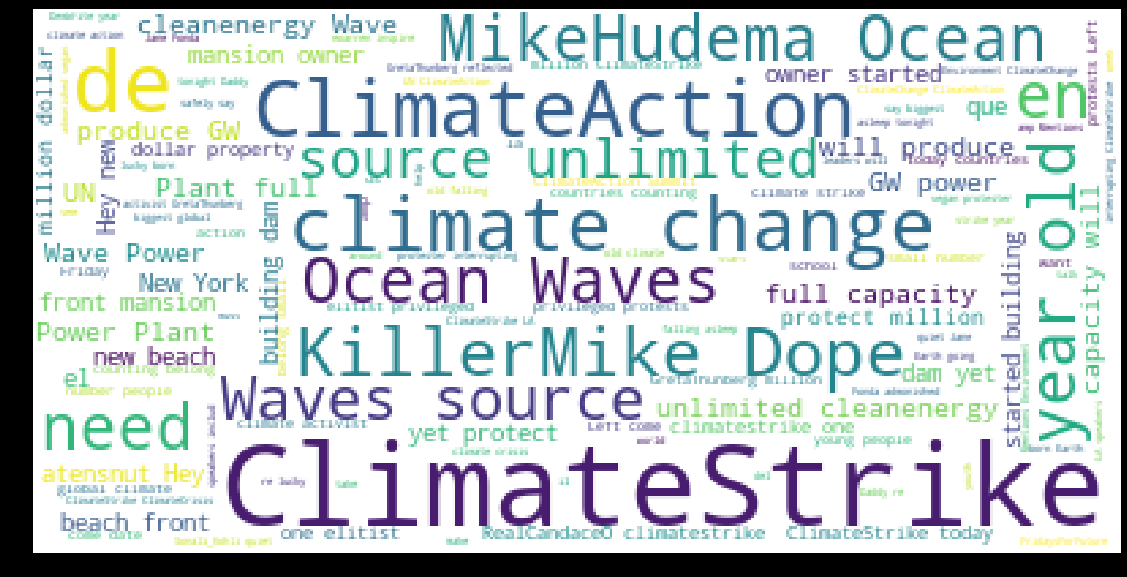

In [7]:
def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
wordcloud(tweets,'text')  

### Inference: 
The top keywords that turn up in texts that contain the hashtags include KillerMike, Waves Source, climate change, need, ocean waves etc.

### WordCloud 2: Who are the top users who use #climatestrike and #climateaction

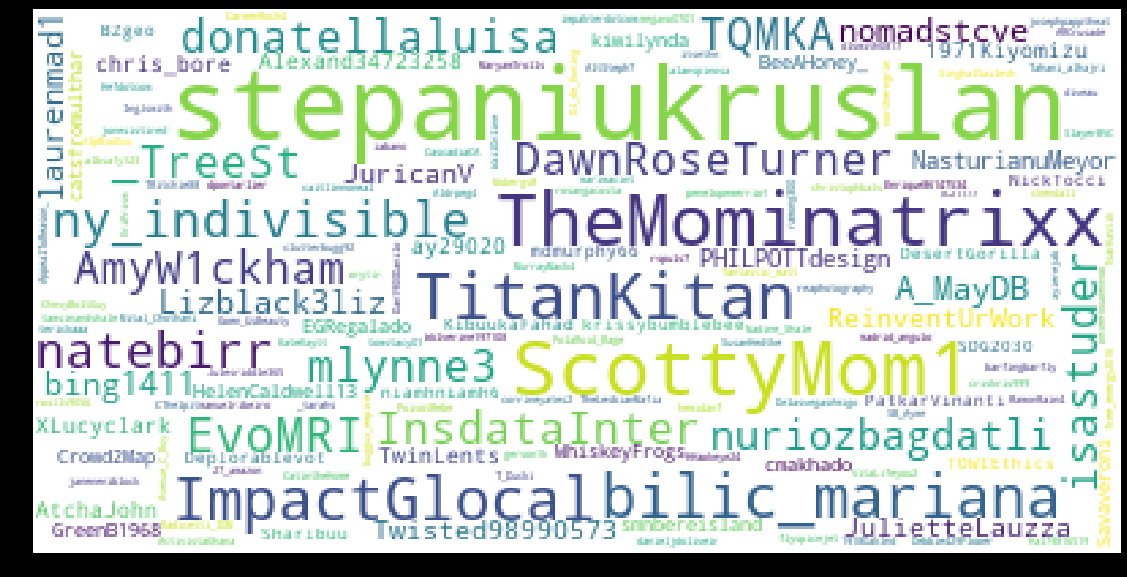

In [8]:
wordcloud(tweets, 'Username')

### Inference
The top users who post about these hashtags include @stepaniukruslan, @ImpactGlobal etc. The top 10 users have been mapped out below.

## Quantifying the top hashtag users of #climatestrike and #climateaction

In [9]:
# from tutorial: Identify top topics using Word Cloud 
# https://towardsdatascience.com/identify-top-topics-using-word-cloud-9c54bc84d911

import collections
import matplotlib.cm as cm
from matplotlib import rcParams
# previously, stopwords have been put in a function, thus it has to be mentioned
# again for the code to run
stopwords = set(STOPWORDS)

filtered_words = [word for word in tweets['Username'] if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

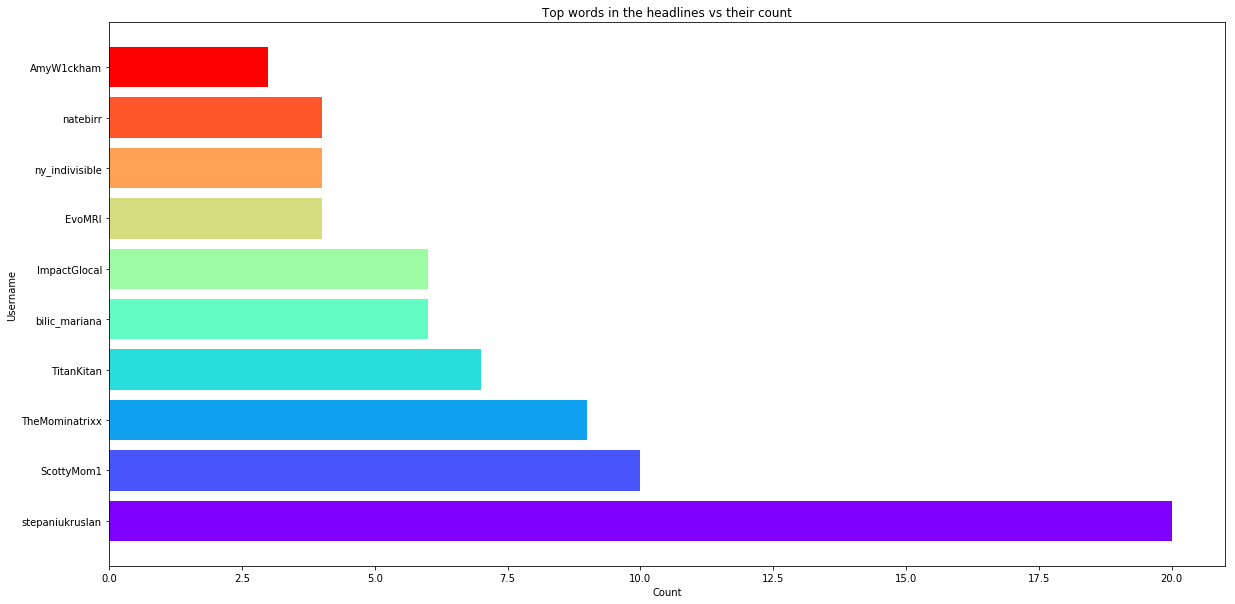

In [10]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Username')
plt.barh(words, counts, color=colors)

## Sentiment Analysis
What do people feel about the environment?

In [11]:
# code reference: Twitter Data Analysis with Python
# https://datascienceplus.com/twitter-analysis-with-python/

#nltk
import nltk
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
import sklearn # import scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harshikajain/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harshikajain/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### What is this piece of code doing
1. From all words, replace special characters with a space using re.sub('[^A-Za-z]', ' ', line)
2. Lemmatize these words to map all the words to their lemmatized version. This helps in mapping words with similar meaning to a single word. This helps analysing the data properly.
3. We are also removing English stop words. This will remove all the stop words such as "a", "an", "the" etc. which are not contributing to the serntiment analysis.
4. We use the TfidfVectorizer which convert a collection of raw documents to a matrix of TF-IDF features.
5. We will use the vectorizer from the previous step and will use the existing library function fit_transform to transform this data to term-document matrix. Now this data is ready for sentiment analysis.

In [12]:
tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweets['text']]       
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text_lem'].str.upper())
sid = SentimentIntensityAnalyzer()
tweets['sentiment_compound_polarity']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

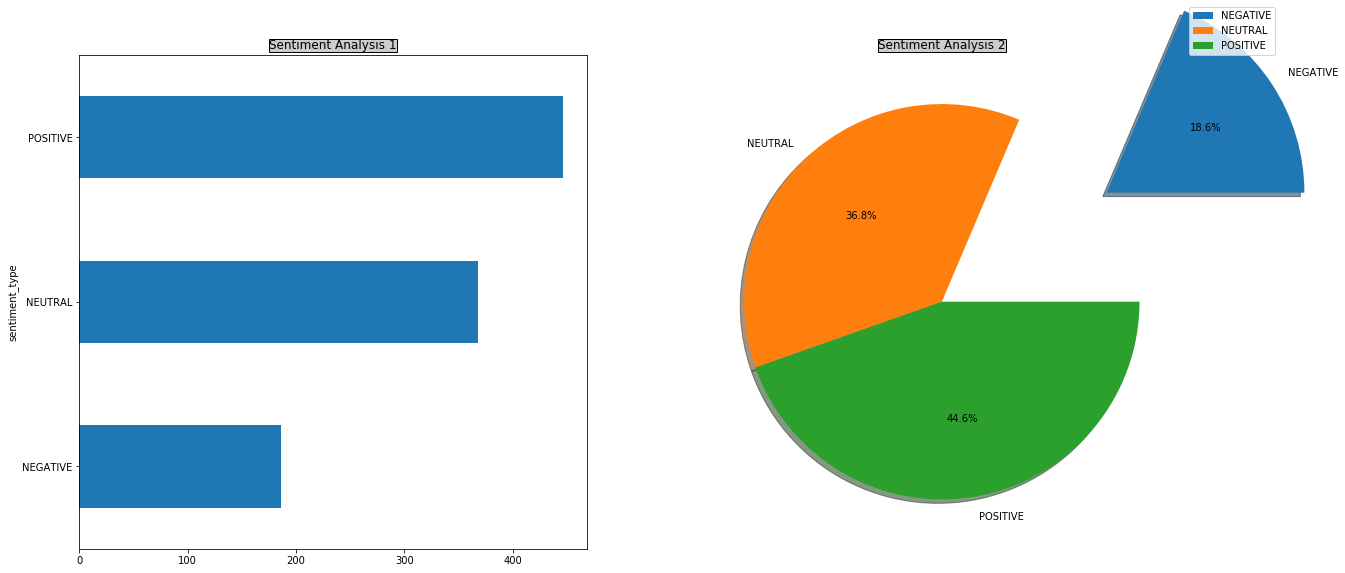

In [13]:
tweets_sentiment = tweets.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentiment.rename("",inplace=True)
explode = (1, 0, 0)
plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(20, 20))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
tweets_sentiment.plot(kind='pie',figsize=(20, 20),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

### Inference: 
This graph indicates that people have a positive outook towards the climate. My initial assumption was that people have a negative outlook towards the environment, given the climate change happening, but the sentiment analysis indicates that people have a positive outlook, and might even want to take remedial actions. 

## Some Failed Plots
I tried to make plots to quantify the tweets by the users, but the graph is not meant for 1000 values on the x axis, thus shifted to the more representative rainbow coloured graph.

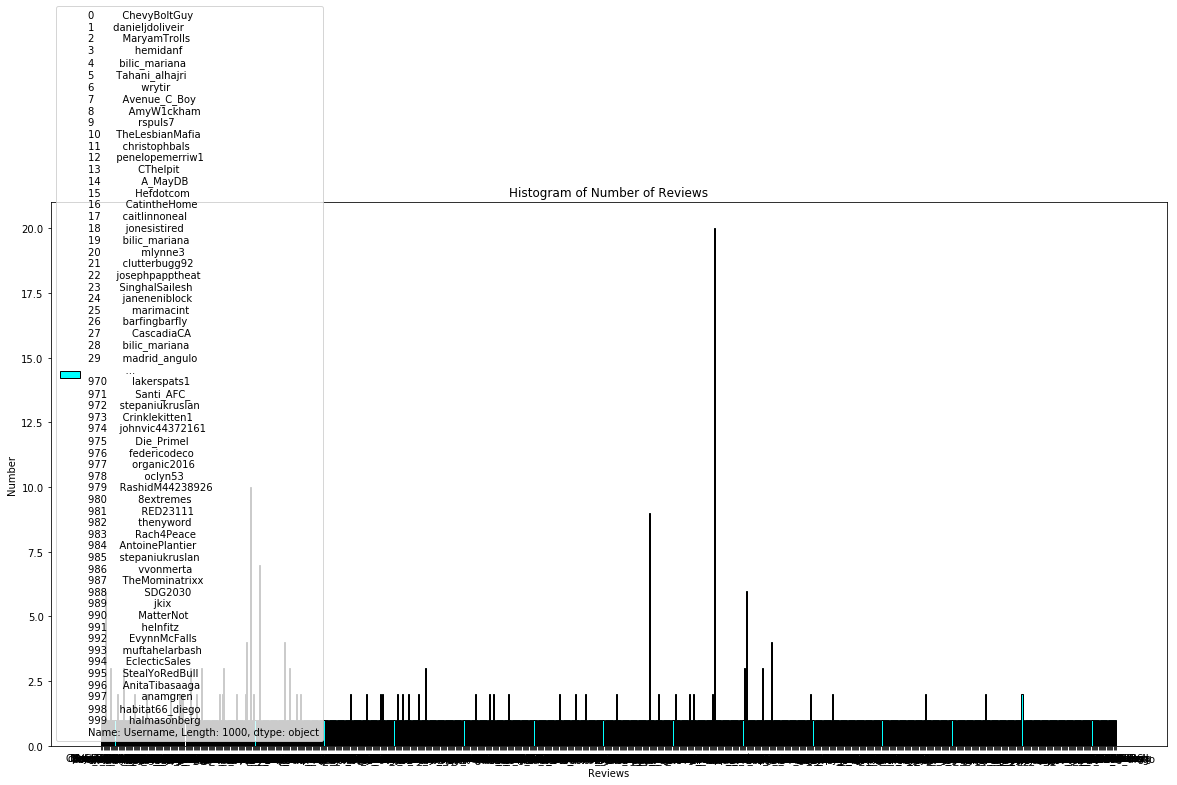

In [14]:
plt.hist([tweets['Username']], color = 'cyan', edgecolor = 'black', bins = 1000, label=[tweets['Username']])
plt.title('Histogram of Number of Reviews')
plt.xlabel('Reviews')
plt.ylabel('Number')
plt.legend()
plt.show()

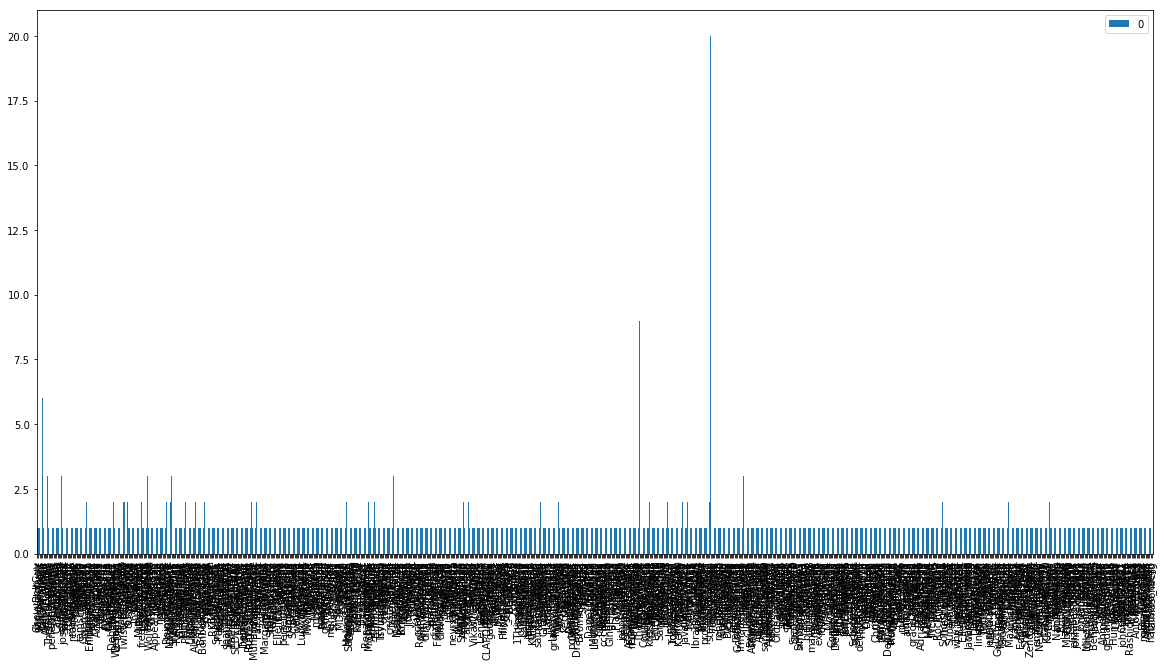

In [15]:
import pandas as pd
from collections import Counter
letter_counts = Counter(tweets['Username'])
# print(letter_counts)                         
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')

## List of Resources
1. Generating Wordclouds in Python by Duong Wu: https://www.datacamp.com/community/tutorials/wordcloud-python
2. Twitter Data Analysis with Python by Julie Heiduk: https://datascienceplus.com/twitter-analysis-with-python/
3. NLTK documentation: https://github.com/nltk/nltk
4. Identify top topics using Word Cloud by Karan Bhanot: https://towardsdatascience.com/identify-top-topics-using-word-cloud-9c54bc84d911
5. Tfid vectorizer documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
6. Downloading Data from Twitter using the Streaming API:  https://medium.com/@jaimezornoza/downloading-data-from-twitter-using-the-streaming-api-3ac6766ba96c 